In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

We want to be able to experiment with expectation values for various estimators for different underlying populations.
First, let's write a routine that returns the sample mean and variance for an input sample. Let's do this using numpy
array arithmetic, but only using the sum() method. These should be calculated using:$\bar x = {1\over N} \Sigma x_i$ and $\sigma^2 = {1\over N-1}\Sigma (x_i-\bar x)^2$. You have to fill in the missing code:

In [2]:
def stats(sample) :
    """ Return the sample mean and standard deviation of an input sample"""
    # calculation of mean and variance here
    n=len(sample)   #remove
    mean=sample.sum()/n   #remove
    variance=((sample**2).sum()-sample.sum()**2/n)/(n-1) #remove
    
    return mean, variance

Let's now write a routine that will generate a sample of input size, with an option for using either a uniform or a Gaussian (normal) distribution. Here we will consider a uniform distribution with values distributed between 0 and 1, and a normal distribution with zero mean and unit standard deviation. Samples for these distributions can be generated using the numpy.random.uniform() function or the numpy.random.normal() function; you have to fill in the missing function calls:

In [3]:
def getsample(size,uniform=True) :
    """Generate a sample of input size from a uniform distribution (0-1) 
       if uniform is True, else a normal distribution with zero mean
       and unit standard deviation
    """
    if uniform :
        # np.random.uniform call here
        sample=np.random.uniform(size=size)  #remove
    else :
        # np.random.normal call here
        sample=np.random.normal(size=size)   #remove
        
    return sample

Let's do a quick test of your routines. Generate a sample using the getsample() routine (test both uniform and normal), use stats() to get the mean and variance. Check the results using the numpy.mean() and numpy.std() methods on the samples (if you are not getting the same values, you have a problem!). Check the samples by looking at a histogram. Do this for both a uniform and a normal distribution. You have to choose the sample size and the distribution type, and set bins for the histogram accordingly:


calculated mean:    0.50   variance:  0.0823
numpy mean:    0.50   variance  0.0822
PROBLEM WITH VARIANCE? How does numpy compute variance by default?


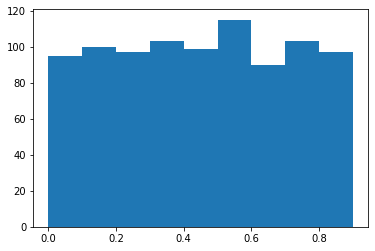

In [4]:
n= 1000    # choose a sample size here, remove value
uniform=  True  #  boolean to set type of distribution here, remove value
sample=getsample(n,uniform=uniform)
xmin=0  # remove value
xmax=1  # remove value
delta=0.1  # remove value
plt.hist(sample,bins=np.arange(xmin,xmax,delta))  # set appropriate bins here using xmin,xmax,delta
mean,variance=stats(sample)
print('calculated mean: {:7.2f}   variance: {:7.4f}'.format(mean,variance))
print('numpy mean: {:7.2f}   variance {:7.4f}'.format(sample.mean(),sample.var()))
if not np.isclose(sample.mean(),mean) : print('PROBLEM WITH MEAN!')
if not np.isclose(sample.var(),variance) : print('PROBLEM WITH VARIANCE? How does numpy compute variance by default?')

What did you learn about the numpy variance method (which is also true for the standard deviation method)?What do you think about your distributions and your estimators? How do they change with size of the sample?

<B>ANSWER HERE:</B>: The numpy variance method by default calculates the variance as $\sigma^2 = 1/N\sum (x^2-\bar x^2)$ which is biased, as it does not use (N-1). Need to specify ddof=1 to get correct behavior when using a sample mean. As for the distributions and estimators, they are noisier for smaller n and converge towards smooth distribution and fixed values of mean and variance as the sample size increases.

What are the true values of the mean and variance for a uniform distribution? Calculate them analytically.  Do you get these values exactly with your samples? Why or why not?

<B>ANSWER HERE:</B> For $P(x) = 1$ for $x>0$ and $x<=1$, and 0 elsewhere, we have a normalized PDF. The mean is <br>
$\int x P(x) dx = {x^2\over 2}|^1_0 = 1/2$.  <br>
The variance is <br>
$\int (x-\bar x)^2 dx = \int x^2 dx - \bar x^2 = 1/3 - 1/4 = 1/12$

Experiment with running them multiple times, with different sample sizes, say from 10 points per sample to 1000 points per sample.

OK, now let's generate some expectation values. To do this, let's write a routine to generate a large number of samples (nsamp), each of size n, calculate the sample mean and variance for each, then average these together to get the expectation value. So, the expectation value of the mean is the "mean mean", and the expectation value of the variance is the "mean variance". Let's also calculate the "mean standard deviation". You hsve to fill in the expressions to calculate the expectation values:

In [5]:
def expectations(nsamp,n,uniform=True) :
    """ Calculate expectation values by drawing nsamp samples, each one with n members
        and calculcating expectation values by averaging the statistics from each sample
    """
    all_means=[]
    all_variances=[]
    all_std=[]
    for i in range(nsamp) :
        sample=getsample(n,uniform=uniform)
        mean,variance=stats(sample)
        all_means.append(mean)
        all_variances.append(variance)
        all_std.append(np.sqrt(variance))
    all_means=np.array(all_means)
    all_variances=np.array(all_variances)
    all_std=np.array(all_std)
    
    expectation_mean=np.array(all_means).mean()     #remove expression
    expectation_variance=np.array(all_variances).mean()  #remove expression
    expectation_std=np.array(all_std).mean()   # remove expression
    return expectation_mean,expectation_variance,expectation_std

Do some tests of your routine:

In [6]:
nsamp=100   # remove value
n=10    #remove value
m,v,s=expectations(nsamp,n)
print(m,v,s)

0.48955705669701916 0.0882838294828178 0.2918086244499138


Try running this for a large number of samples, for a range of different sample sizes. Let's also look at the expectation value of the square root of the variance, which you might think is an estimator of the population standard deviation.
Make plots of these expectation values as a function of sample size

0.4999180582634607 0.2886918883201706


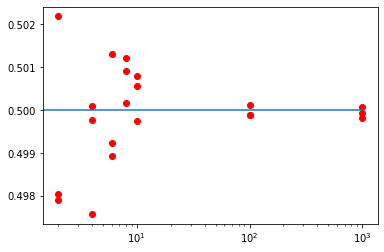

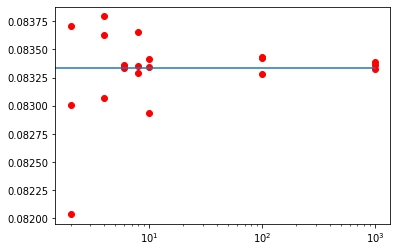

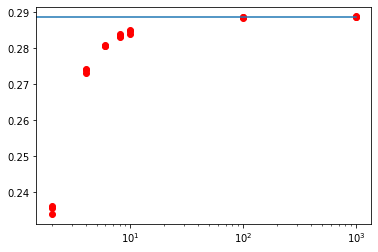

In [12]:
nsamp=10000
sizes=[2,4,6,8,10,100,1000]*3
all_expectation_mean=[]
all_expectation_variance=[]
all_expectation_std=[]
for n in sizes :
    m,v,s=expectations(nsamp,n)
    all_expectation_mean.append(m)
    all_expectation_variance.append(v)
    all_expectation_std.append(s)
    
plt.plot(sizes,all_expectation_mean,'ro')
plt.plot([0,1000],[0.5,0.5])
plt.xscale('log')
plt.figure()
plt.plot(sizes,all_expectation_variance,'ro')
plt.plot([0,1000],[1./12.,1./12.])
plt.xscale('log')
plt.figure()
plt.plot(sizes,all_expectation_std,'ro')
plt.plot([0,1000],np.sqrt([1./12.,1./12.]))
plt.xscale('log')
print(m,s)


Are the expectation values of the mean, variance, and standard deviation biased or unbiased? Are they consistent (converge to correct value as n increases)?


<B> ANSWER HERE: </B>: The mean and variance appear unbiased, but not the standard deviation. They all appear to be consistent.

OK, now lets consider the variance of the estimators. What do you expect for the standard deviation of the mean (standard error of the mean)?

<B> ANSWER HERE:</B> The standard error of the mean is $\sigma^2 / n$, so we expect it to decrease as $\sqrt{1/n}$

Let's calculate a bunch of means, and look at their spread and variance

0.02895350996827387


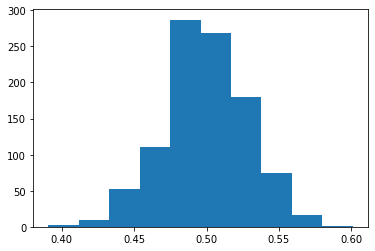

In [8]:
def getmeans(nsamp=1000,n=100,uniform=True) :
    """return an array of sample means for input number of samples and sample sizes
    """
    all_means=[]
    for i in range(nsamp) :
        sample=getsample(n,uniform=uniform)
        mean,variance=stats(sample)
        all_means.append(mean)
    return np.array(all_means)

all_means= getmeans(nsamp=1000,n=100,uniform=True)
plt.hist(all_means)
print(np.array(all_means).std())
 
    

How does the variance in the mean depend on the sample size? Calculate the standard deviation for a number of sample sizes, 
and plot as a function of sample size to check the behavior:

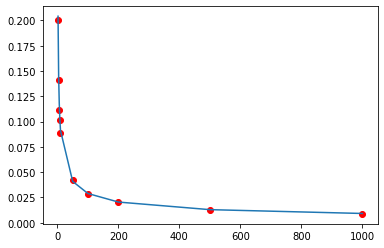

In [9]:
# add code here
sizes=np.array([2,4,6,8,10,50,100,200,500,1000])
all=[]
for size in sizes :
    all.append(np.std(getmeans(n=size)))
plt.plot(sizes,all,'ro')
plt.plot(sizes,np.sqrt(1/12*1/sizes))
        

Standard error of the mean behaves as expected!

What if you calculated the median instead of the mean? What would you expect for the standard deviation of the median as compared with that of the mean? As a function of sample size?

<B>ANSWER HERE:</B> Expect that the median is less efficient, i.e. has a larger standard deviation. For a Gaussian, the expectation is that it is larger by pi/2., but this is a uniform distribution... But also expect that the standard deviation of the median will decrease with sample size.

Now do the same experiment for the median of each sample. Write a getmedians() routine like getmeans() above. You can use np.median(sample) instead of your stats routine to calculate the median of an individual sample. Make the plot of variances as a function of sample size.

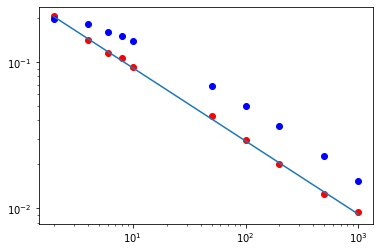

In [10]:
# add code here
def getmedians(nsamp=1000,n=100,uniform=True) :
    """return an array of sample means for input number of samples and sample sizes
    """
    all_medians=[]
    for i in range(nsamp) :
        sample=getsample(n,uniform=uniform)
        all_medians.append(np.median(sample))
    return np.array(all_medians)


all_means=[]
all_medians=[]
for size in sizes :
    all_means.append(np.std(getmeans(n=size)))
    all_medians.append(np.std(getmedians(n=size)))
plt.loglog(sizes,all_means,'ro')
plt.loglog(sizes,all_medians,'bo')
plt.loglog(sizes,np.sqrt(1/12*1/sizes))


Did it come out as expected?

<b> ANSWER HERE: </b> : Yes!

You can continue with this for other estimators. What about the midrange estimator for the population mean? Sigma-clipped values? What about the 
mean absolute deviation for the population standard deviation?

In [11]:
# open-ended code, analysis and discussion here!